In [1]:
#Код для генерации диаграмм, не обращайте внимание
import base64
import io, requests
from IPython.display import Image, display
from PIL import Image as im
import matplotlib.pyplot as plt

def mm(graph):
    graphbytes = graph.encode("utf8")
    base64_bytes = base64.urlsafe_b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    img = im.open(io.BytesIO(requests.get('https://mermaid.ink/img/' + base64_string).content))
    plt.imshow(img)
    plt.axis('off') # allow to hide axis
    plt.savefig('image.png', dpi=1200)

# Некоторые из связей в UML-диаграмме классов:

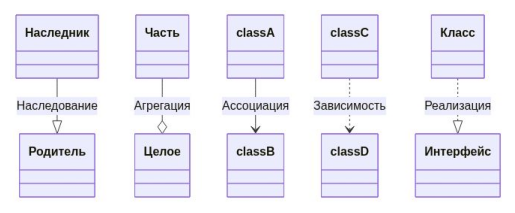

In [12]:
mm('''
classDiagram
Наследник --|> Родитель : Наследование
Часть --o Целое : Агрегация
classA --> classB : Ассоциация
classC ..> classD : Зависимость
Класс ..|> Интерфейс : Реализация''')

## Наследование

In [13]:
class Roditel:
    pass

class Naslednik(Roditel):
    pass

## Агрегация

In [14]:
class Chast:
    pass

class Tseloe:
    chast: Chast
    def __init__(self, chast:Chast):
        self.chast=chast

c:Chast=Chast()
t:Tseloe=Tseloe(c)

## Ассоциация
Ассоциация показывает, что два класса взаимодействуют друг с другом, но при этом не являются наследниками или родственниками и не зависят друг от друга. Ассоциация может включать в себя в том числе и Агрегацию. 

## Зависимость
Логика одного класса зависит от другого класса

In [15]:
class Book:
    title:str="Заголовок"

class Person:
    def read(self, book:Book):
        print(book.title)

p:Person=Person()
b:Book=Book()
p.read(b)
b.title="Другой заголовок"
p.read(b)

Заголовок
Другой заголовок


## Реализация

Наследование и реализация (добавление логики) родительского класса. Обычно к абстрактным классам и интерфейсам.

In [16]:
import abc
class SpeakInterface(abc.ABC):
    @abc.abstractmethod
    def speak(self):
        pass

class Dog(SpeakInterface):
    def speak(self):
        print("Гав")
